<a href="https://colab.research.google.com/github/gillesvtsilvano/MPL_MNIST/blob/master/MPL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
# Pesquisar autokeras
# Francois Cholet

batch_size = 128
num_classes = 10
epochs = 20

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
"""
Categorical Crossentropy & RMSprop:
  Test loss: 0.1310287229978901
  Test accuracy: 0.9821
  

"""

history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2175 - acc: 0.9343 - val_loss: 0.1046 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0811 - acc: 0.9749 - val_loss: 0.0716 - val_acc: 0.9783
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0549 - acc: 0.9832 - val_loss: 0.0787 - val_acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0710 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0304 - acc: 0.9910 - val_loss: 0.0905 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0236 - acc: 0.9928 - val_loss: 0.0770 - val_acc: 0.9827
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0844 - val_acc

In [0]:
#y_test.size / y_test[0].size = 10.000
#x_test.size / x_test[0].size = 10.000
def to_numeric(y):
  counter = 0
  for element in y:
    if element:
      return counter
    counter += 1

In [0]:
import numpy as np

prediction = model.predict_classes(x_test)
target = np.argmax(y_test, axis=1)

3 3


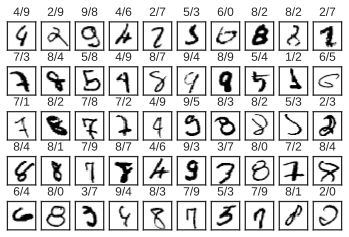

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from google.colab import files

miss = 0
nlines = 5
ncols = 10

# 10000 values
for idx, (p, t) in enumerate(zip(prediction, target)):
  if p != t:
    miss += 1

    plt.subplot(nlines, ncols, miss)
    plt.title(str(t) + '/' + str(p))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array_split(x_test[idx], 28))
    # plt.savefig(str(idx) + '_' + str(p) + '_' + str(t))
    # print("{}/{}: Pred: {} Target: {}".format(miss, idx, p, t))
    
    if miss >= nlines * ncols:
      break

plt.savefig('output.pdf')
files.download('output.pdf')